# **Submitted By :**
## Name = PREETI
## Email Id = preetipradhan097@gmail.com
## Course = Master Of Computer Applications
## Department = Information Technology
## Year and Semester = 1st Year and 2nd Semester

# **Data Science & Business Analytics**

# **Task Description**

Prediction using Supervised ML

● Predict the percentage of an student based on the no. of study hours.
● This is a simple linear regression task as it involves just 2 variables.
● You can use R, Python, SAS Enterprise Miner or any other tool
● Data can be found at http://bit.ly/w-data
● What will be predicted score if a student studies for 9.25 hrs/ day?


In [ ]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# allow plots to appear directly in the notebook
%matplotlib inline

In [ ]:
# In Python’s Pandas module, the Dataframe class provides a head() function to fetch top rows from a Dataframe i.e.
# DataFrame.head(self, n=5)
# It returns the first n rows from a dataframe. If n is not provided then default value is 5.
df=pd.read_csv("http://bit.ly/w-data")
print("\n DATA IMPORTED SUCCESSFULLY\n")
df


 DATA IMPORTED SUCCESSFULLY



,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
# print the shape of the DataFrame
df.shape

(25, 2)

In [ ]:
# show the boolean dataframe
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [ ]:
# Count total missing value at each column in a DataFrame
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

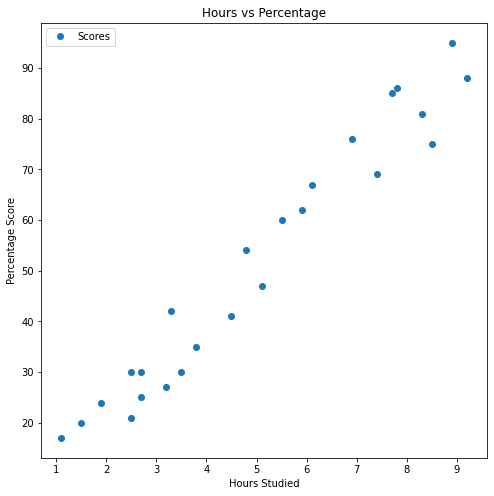

In [ ]:
#Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.
# Plotting the distribution of scores
plt.rcParams["figure.figsize"]=(8,8)
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# **Plot min and max for Hours, Scores using bar graph. Use blue for min and red for max**.


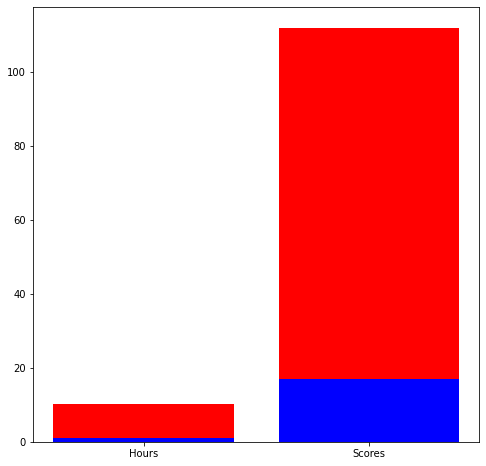

In [ ]:
# data set
x = ['Hours','Scores']
y1 = [df['Hours'].max(), df['Scores'].max()]
y2 = [df['Hours'].min(), df['Scores'].min()]
# plot stacked bar chart
plt.bar(x, y2, color='b')
plt.bar(x, y1, bottom=y2, color='r')
plt.show()


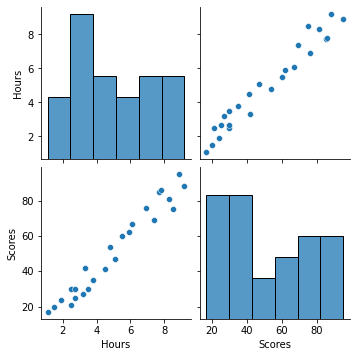

In [ ]:
# seaborn, which is another Python data visualization library that makes it easier to create beautiful visualizations using matplotlib.
sns.pairplot(df)

# **Draw box-plots for each attribute to detect if there are any outliers**.

Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).
median (Q2/50th Percentile): the middle value of the dataset.
first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.
third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.
interquartile range (IQR): 25th to the 75th percentile.
“maximum”: Q3 + 1.5*IQR
“minimum”: Q1 -1.5*IQR

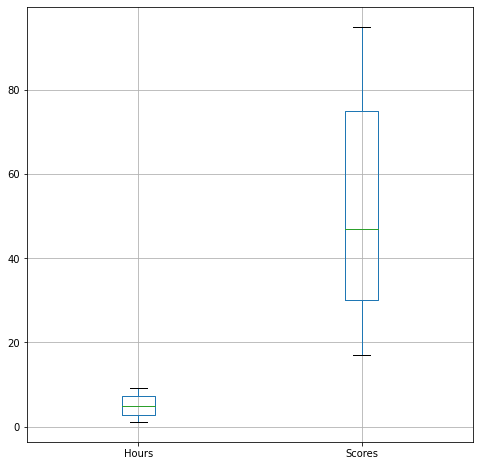

In [ ]:
np.random.seed(1234)
boxplot = df.boxplot(column=['Hours', 'Scores'])

# **Find the correlation between the following pairs of attributes: Hours and Scores**

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


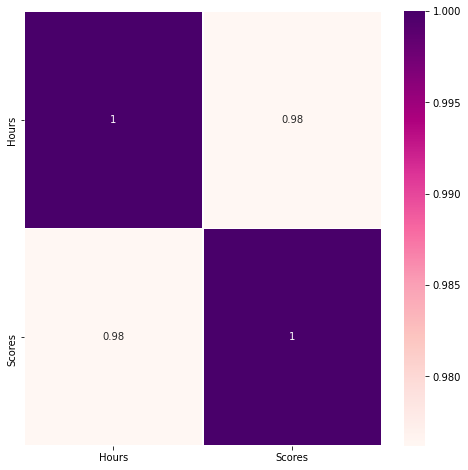

In [ ]:
corrmatrix1=df.corr(method='pearson')
print(corrmatrix1)
sns.heatmap(corrmatrix1, xticklabels=corrmatrix1.columns,
 yticklabels=corrmatrix1.columns,
 cmap='RdPu',
 annot=True,
 linewidth=0.5)
plt.show()

# **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values  

# **Split the dataset into train and test, into 70% and 30% respectively**.

In [ ]:
# Train & Test split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size = 0.3,random_state=1)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(17, 1) (8, 1) (17,) (8,)


In [ ]:
X_train

array([[3.5],
       [3.2],
       [2.7],
       [9.2],
       [5.5],
       [3.8],
       [5.1],
       [2.5],
       [2.5],
       [8.9],
       [7.8],
       [6.9],
       [2.7],
       [8.3],
       [4.5],
       [5.9],
       [1.5]])

In [ ]:
X_test

array([[1.1],
       [3.3],
       [1.9],
       [8.5],
       [4.8],
       [7.7],
       [6.1],
       [7.4]])

In [ ]:
Y_train

array([30, 27, 30, 88, 60, 35, 47, 30, 21, 95, 86, 76, 25, 81, 41, 62, 20])

In [ ]:
Y_test

array([17, 42, 24, 75, 54, 85, 67, 69])

# **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [ ]:
#Fitting of Linear Regression Model
### SCIKIT-LEARN ###
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

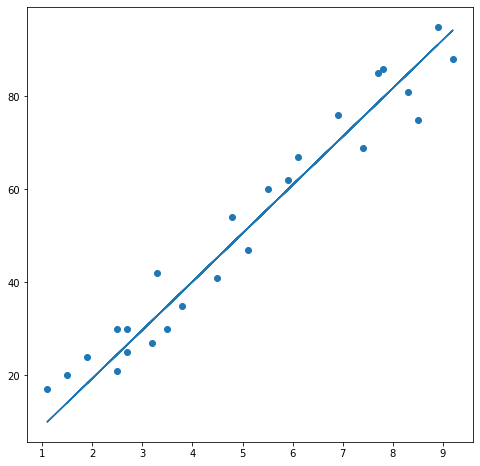

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

### Train the linear regression model and print the coefficients (parameters)

In [ ]:
# print the coefficients
print (regressor.intercept_)
print (regressor.coef_)

-1.5123061161277889
[10.41075981]


# **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
#Evaluating the linear regression model
Y_pred=regressor.predict(X_test)
Y_pred

array([ 9.93952968, 32.84320126, 18.26813752, 86.97915227, 48.45934097,
       78.65054442, 61.99332873, 75.52731648])

In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df

,Actual,Predicted
0,17,9.939530
1,42,32.843201
2,24,18.268138
3,75,86.979152
4,54,48.459341
5,85,78.650544
6,67,61.993329
7,69,75.527316


In [ ]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 94.78722212956563


# **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. 

In [ ]:
#Printing values of RMSE,MAE and MSE
print("MSE : ",mean_squared_error(Y_test, Y_pred))
print("RMSE : ",math.sqrt(mean_squared_error(Y_test, Y_pred)))
print("MAE : ",mean_absolute_error(Y_test, Y_pred))

MSE :  56.092330905646705
RMSE :  7.489481350911204
MAE :  7.169048271425507
